In [1]:
import DataHandlers
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set()

In [2]:
# Demand data from previous spreadsheet planner | Exported 13 May 2019 @ 19:30
confirmed_fte = [17.00, 22.00, 25.50, 27.50, 30.00, 28.00, 30.50, 28.50, 32.00, 31.00, 37.50, 40.00, 39.00, 35.50, 30.00, 29.50, 27.00, 24.50, 24.00, 23.00, 22.50, 22.00, 17.50, 18.00, 18.00, 16.50, 17.50, 17.50, 17.50, 13.00, 12.00, 12.00, 12.00, 12.00, 11.00, 10.00, 10.00, 10.00, 9.00, 9.00, 9.00]

confirmed_fte = pd.Series(confirmed_fte, 
                          index=pd.date_range(start=pd.datetime(2018,11,1),end=pd.datetime(2022,3,31), freq='MS'),
                          name='spreadsheet confirmed')
confirmed_fte.index = confirmed_fte.index


unconfirmed_fte = [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 6.50, 6.50, 6.50, 6.50, 7.50, 7.50, 6.50, 5.50, 5.50, 5.50, 5.50, 5.50, 8.00, 8.00, 8.00, 8.00, 8.50, 8.50, 7.50, 6.50, 6.50, 6.50, 6.50, 6.50, 0.50, 0.50, 0.00, 0.00, 0.00, 0.00, 0.00]

unconfirmed_fte = pd.Series(unconfirmed_fte, 
                          index=pd.date_range(start=pd.datetime(2018,11,1),end=pd.datetime(2022,3,31), freq='MS'),
                          name='spreadsheet unconfirmed')
unconfirmed_fte.index = confirmed_fte.index


total_fte = confirmed_fte + unconfirmed_fte

In [3]:
#start_date = fc.date_range.min()
#end_date = fc.date_range.max()

start_date = pd.datetime(2017,4,1)
end_date = pd.datetime(2022,3,31)
offset=14

today = pd.datetime(2019,5,22)

resample_freq = 'MS'

In [4]:
# Load capacity data exported from previous spreadsheet planner 13 May 2019
capacity = pd.read_csv('reg_capacity.csv', index_col='Month')
capacity = capacity.T
capacity.index = pd.to_datetime(capacity.index, format='%b-%y')
capacity = capacity.loc[start_date:end_date]
capacity[1:10]

Month,REG Permanent capacity,REG FTC capacity,REG Associate capacity,University Partner capacity,Total capacity
2017-05-01,4.5,0.0,0.0,0.0,4.5
2017-06-01,5.5,0.0,0.0,0.0,5.5
2017-07-01,5.5,0.0,0.0,0.0,5.5
2017-08-01,5.5,0.0,0.0,0.0,5.5
2017-09-01,5.5,0.0,0.0,0.0,5.5
2017-10-01,6.0,0.0,0.0,0.0,6.0
2017-11-01,7.0,0.0,0.0,0.0,7.0
2017-12-01,8.5,0.0,0.0,0.0,8.5
2018-01-01,10.0,0.0,0.0,0.0,10.0


In [5]:
fc = DataHandlers.Forecast(data_source='csv')

In [6]:
research_support_idx = 745541
reg_management_idx = 745540
reg_dev_idx = 868971

research_support_projs = fc.projects[fc.projects.client_id==research_support_idx].index
reg_management_projs = fc.projects[fc.projects.client_id==reg_management_idx].index
reg_dev_projs = fc.projects[fc.projects.client_id==reg_dev_idx].index

research_support_reqs = fc.project_reqs[research_support_projs].sum(axis=1)
reg_management_reqs = fc.project_reqs[reg_management_projs].sum(axis=1)
reg_dev_reqs = fc.project_reqs[reg_dev_projs].sum(axis=1)

In [7]:
reqs = fc.project_reqs.sum(axis=1)

reqs = pd.DataFrame({'Confirmed projects':reqs,'REG Management':reg_management_reqs,'REG Development':reg_dev_reqs,'Research Support':research_support_reqs})


reqs.head()


,Confirmed projects,REG Management,REG Development,Research Support
2017-04-03,2.73875,0.73625,0.0,0.36875
2017-04-04,2.73875,0.73625,0.0,0.36875
2017-04-05,2.73875,0.73625,0.0,0.36875
2017-04-06,2.73875,0.73625,0.0,0.36875
2017-04-07,2.73875,0.73625,0.0,0.36875


In [8]:
reqs = DataHandlers.select_date_range(reqs, start_date, end_date, drop_zero_cols=False)

reqs = reqs.resample(resample_freq).mean()
#reqs.index = reqs.index + pd.Timedelta(offset, unit='D')

#FUDGE
reqs.loc[pd.datetime(2017,4,1),'Confirmed projects'] = 4.0
reqs.loc[pd.datetime(2017,5,1),'Confirmed projects'] = 4.5
reqs.loc[pd.datetime(2017,6,1),'Confirmed projects'] = 5.5
reqs.loc[pd.datetime(2017,7,1),'Confirmed projects'] = 5.5
reqs.loc[pd.datetime(2017,8,1),'Confirmed projects'] = 5.5
reqs.loc[pd.datetime(2017,9,1),'Confirmed projects'] = 5.5
reqs.loc[pd.datetime(2017,10,1),'Confirmed projects'] = 6
reqs.loc[pd.datetime(2017,11,1),'Confirmed projects'] = 7
reqs.loc[pd.datetime(2017,12,1),'Confirmed projects'] = 8.5
reqs.loc[pd.datetime(2018,1,1),'Confirmed projects'] = 10
reqs.loc[pd.datetime(2018,2,1),'Confirmed projects'] = 10
reqs.loc[pd.datetime(2018,3,1),'Confirmed projects'] = 10
reqs.loc[pd.datetime(2018,4,1),'Confirmed projects'] = 10.5


reqs['Confirmed projects'] = reqs['Confirmed projects'] - reqs['REG Management'] - reqs['REG Development'] - reqs['Research Support']

unconfirmed = fc.placeholder_totals[26903] + fc.placeholder_totals[26910]
unconfirmed = unconfirmed.resample(resample_freq).mean() 
#unconfirmed.index = unconfirmed.index + pd.Timedelta(offset, unit='D')

deferred = fc.placeholder_totals[26905]
deferred = deferred.resample(resample_freq).mean() 
#deferred.index = deferred.index + pd.Timedelta(offset, unit='D')


to_plot = reqs.copy()
to_plot['Projects with funder'] = unconfirmed
to_plot['Deferred projects'] = deferred
#to_plot = pd.DataFrame({'Confirmed demand':reqs,'Unconfirmed demand':unconfirmed, 'Deferred demand':deferred})

to_plot = to_plot[['REG Management','REG Development','Research Support','Confirmed projects','Projects with funder','Deferred projects']]

to_plot.head(10)

,REG Management,REG Development,Research Support,Confirmed projects,Projects with funder,Deferred projects
2017-04-01,0.73625,0.00000,0.36875,2.89500,0.0,0.0
2017-05-01,0.73625,0.00000,0.39000,3.37375,0.0,0.0
2017-06-01,0.88125,0.50625,0.43500,3.67750,0.0,0.0
2017-07-01,0.88125,0.50625,0.39000,3.72250,0.0,0.0
2017-08-01,0.88125,0.50625,0.49250,3.62000,0.0,0.0
2017-09-01,0.88125,0.50625,0.54625,3.56625,0.0,0.0
2017-10-01,0.92375,0.50625,0.75250,3.81750,0.0,0.0
2017-11-01,0.92375,0.50625,0.80375,4.76625,0.0,0.0
2017-12-01,0.92375,0.50625,1.64125,5.42875,0.0,0.0
2018-01-01,1.14125,0.00000,1.43250,7.42625,0.0,0.0


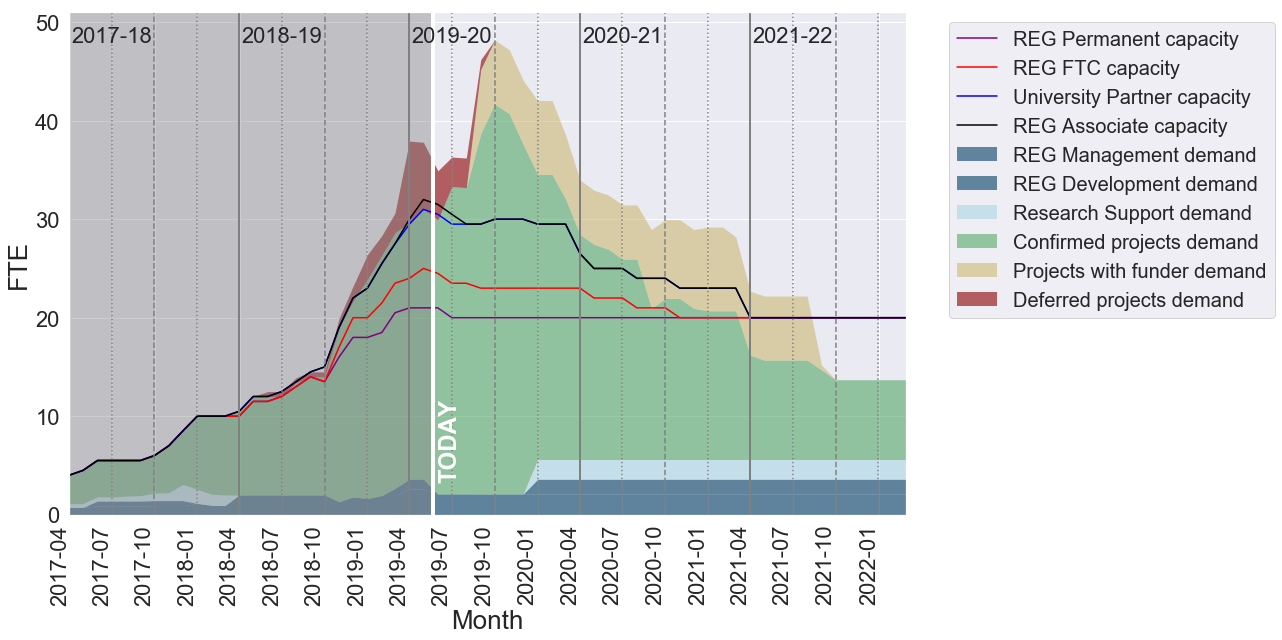

In [30]:
fig = plt.figure(figsize=(18,9))
ax = fig.gca()

to_plot.plot.area(ax=ax, label='Project Demand', x_compat=True, rot=90, alpha=0.6, color=['#043E65','#043E65','lightblue','g','y','darkred'], stacked=True, linewidth=0)

to_plot.columns = ['REG Management demand',
                   'REG Development demand',
                   'Research Support demand',
                   'Confirmed projects demand',
                   'Projects with funder demand',
                   'Deferred projects demand']
# demand from spreadsheet
#confirmed_fte.plot(ax=ax, color='b', rot=90, label='confirmed spreadsheet')
#total_fte.plot(ax=ax, color='b',linestyle='--', rot=90, label='confirmed+unconfirmed spreadsheet')

# capacity
capacity_plotcols = capacity[['REG Permanent capacity',
                              'REG FTC capacity',
                              'University Partner capacity',
                              'REG Associate capacity']]

capacity_plotcols.cumsum(axis=1).plot(ax=ax, rot=90,linewidth=1.5, color=['purple','red','blue','black'])

# axis limits
xlim = ax.get_xlim()
#ylim = ax.get_ylim()
ylim = (0,51)

# add quarter separators
quarters = pd.date_range(start=reqs.index.min(),end=reqs.index.max(),freq='QS')
for q in quarters:
    if q.month==4:
        linestyle = '-'
        linewidth = '2'
    
    elif q.month==7:
        linestyle = ':'
        linewidth = '1.5'        
    
    elif q.month==10:
        linestyle = '--'
        linewidth = '1.5'        
    
    elif q.month==1:
        linestyle = ':'
        linewidth = '1.5'
    
    ax.plot([q, q], ylim, linestyle=linestyle, linewidth=linewidth, color='grey')
    
# format labels and titles
ax.set_xticks(reqs.resample('BQS').mean().index.values)
ax.set_xticklabels(reqs.resample('BQS').mean().index.strftime("%Y-%m").values, fontsize=22)
plt.yticks(fontsize=22)

ax.set_ylabel('FTE', fontsize=26)
ax.set_xlabel('Month', fontsize=26)
#ax.set_title('Research Engineering: Forecast of capacity vs. demand', fontsize=26);

# legend outside plot
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=20)

# reset axis limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Annotate year (Q1) starts
ax.text(pd.datetime(2017,4,5),48,'2017-18', rotation=0, fontsize=22)
ax.text(pd.datetime(2018,4,5),48,'2018-19', rotation=0, fontsize=22)
ax.text(pd.datetime(2019,4,5),48,'2019-20', rotation=0, fontsize=22)
ax.text(pd.datetime(2020,4,5),48,'2020-21', rotation=0, fontsize=22)
ax.text(pd.datetime(2021,4,5),48,'2021-22', rotation=0, fontsize=22)

# Annotate "today" (today defined in first cell)
ax.plot([today, today], ylim, color='white',linewidth=4)

ax.text(today+pd.Timedelta(12,unit='D'), 10, 'TODAY', 
        rotation=90, fontsize=24, color='white', fontweight='bold')

# grey box over the past
ax.fill([start_date,today,today,start_date],[ylim[0],ylim[0],ylim[1],ylim[1]],'grey', alpha=0.4)

plt.tight_layout()
plt.savefig('demand_vs_capacity.png',dpi=300)


## Queries on graph
### High priority
1. Missing demand for 2017-18 (some from missing data in Forecast, some from April 2017 being dropped by `resample`)
  1. Believe no issue with resample, printing index [1:10] instead of [0:10] meant first row not displayed.
1. **Demand / Capacity mismatch 2018-19**
1. Capacity lines need extended to April 2022
  1. Done.
1. Can we do a cumulative sum for all capacity except Total to get lines to match original plot?
  1. Done
1. Can we add year labels to mark clearly the span of each financial year.
  1. Done.
1. **Can we be confident 40 FTE is expected long run average? Perhaps x-FTE per programme (based on current less TF demand) + x-FTE per partner uni (support + TF demand + proj-specific demand)**

### Medium priority
1. Missing unconfirmed demand compared to spreadsheet
1. **Add Scottish Enterprise demand back in time**
1. **Extend Third-party and Edinburgh Safe Haven capacity if demand is solid (check with JH). Should this be TPS or Hut23 project? If Hut23 move REG demand from June to this project.**
1. **Add AI programme demand?**
1. Can we clearly mark 22 May (or 01 June if closest date that's easy to do) as "today" and add a cisual cue to spearate past from future (perhaps a white box over the past or future with alpha to "fade" it)?
  1. Done.

### Low priority
1. Can we separate Hut23 + Research support demand from confirmed and show as "baseline" in another colour below the remaining green confirmed demand (blue perhaps)?
1. Fix duplicate projects in Harvest
1. Split client table by funder.


,2017-04-01 00:00:00,2018-04-01 00:00:00,2019-04-01 00:00:00,2020-04-01 00:00:00,2021-04-01 00:00:00
Data science at scale,0.204233,1.066206,0.000000,0.000000,0.000000
Data science for science and the humanities,0.000000,1.539822,3.277165,2.600000,2.100000
Data-centric engineering,0.817888,2.817589,4.513780,3.401186,0.498024
Defence and security,1.713317,3.176877,3.676772,2.000000,2.000000
External,0.018581,0.000000,0.000000,0.000000,0.000000
Finance and economics,0.052928,0.299407,0.334646,0.000000,0.000000
Health,0.358526,0.908498,2.539862,1.241107,0.411067
Public Policy,0.114980,0.381225,0.921260,1.000000,1.000000
REG Development Work,0.300523,0.060119,0.543504,1.500000,1.500000
REG Management,0.901111,1.886561,2.180709,2.100000,2.100000


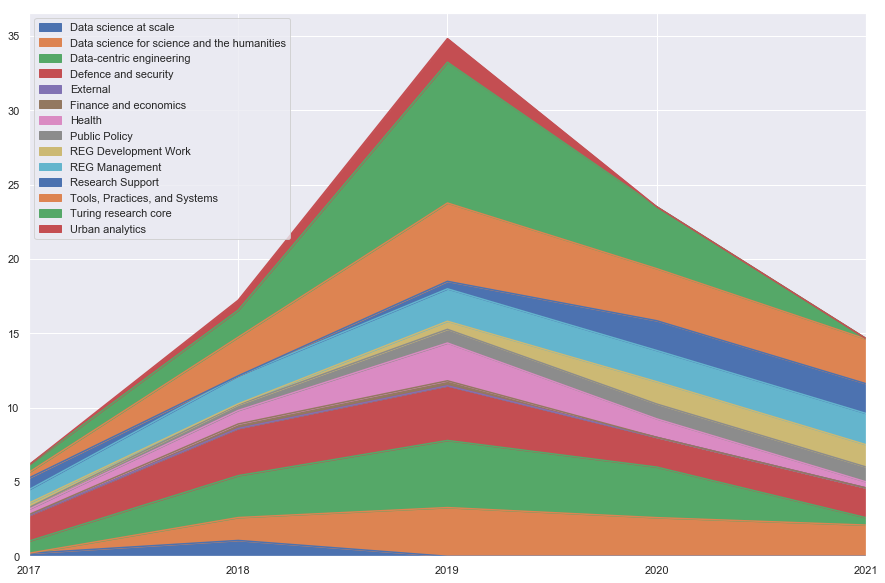

In [21]:
project_ids = fc.project_reqs.copy().columns
clients=[]
for project in project_ids:
    client_id = fc.projects.loc[project, 'client_id']
    
    if not np.isnan(client_id):
        clients.append(fc.clients.loc[client_id,'name'])
    else:
        clients.append('NaN')
    

client_meanfte = fc.project_reqs.copy()
client_meanfte = client_meanfte.groupby(clients,axis=1).sum()
client_meanfte = client_meanfte.resample('AS-APR').mean()

client_meanfte = client_meanfte.loc[:, client_meanfte.sum()>0]

ax = plt.figure(figsize=(15,10)).gca()
client_meanfte.plot.area(ax=ax)

client_meanfte = client_meanfte.T
client_meanfte.T.to_csv('demand_per_client.csv')

client_meanfte